<a href="https://colab.research.google.com/github/Avit-hodibu/NLP/blob/main/1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro NLP:
concerned with the interactions between computers and human language, in particaular how to program computers to process and analyze large amounts of natural language data


Common NLP Tasks
- sentiment analysis
- conversational agents
- knowledge graph and QA systems
- summarization
- topic modelling
- typing behaviour
- text parsing into noun verb
- speech to text


Approaches to NLP
- Heuristic methods - regular expressions(search pattern of text), wordnet(lexical dictonary(maping words)), open mind common sense(facts data)

Ad: fast and quick approches

- machine learning methods: Navie bayes , logistic Regression, SVM, LDA(topic modelling), Hidden Markove Models

text change to number(text vectorization) -> ml algo -> evalutate it

Ad: (open-ended problem) rule made by algo

- deep learning methods: RNN, LSTM(retain loger text also), GRU(text gerneration)/CNN, Transformers, Autoenconders
-- deep learning algorithms retain data in sequential order
-- auto feature selection

Ad: sequential info retain, feature generation is automatically,



Challenge in NLP
- more than one meaning of a sentence
- contextual words
- colloquialisms, slang and idioms
- tone diff (irony, sarcasm)
- spelling errors
- creativity in poems, dialogue and script
- diversity of languages

# NLP pipeline

set of steps followed to build an end to end NLP software.

Step:
- Data acquisition
- Text Preparation: Text Cleanup, Basic Preprocessing, Advance Preprocessing
- Feature Engineering
- Modelling: Model building, Evaluation
- Deployment: Deployment, Monitoring, Model Update

 # Data Acquisition

Avaiable:
if less data do "data augment"(replace with synonms, back translate, bigram flip, add noise)

Others:
web scraping(beautifulsoup), API(Rapid API), public dataset, pdf, Audio(speecj to text), Image

No data:
start taking feedback and manually label it





# Text preparation

Cleaning:
- html tag cleaning (use regular expression )
- emoji = use .encode('utf-8')
- spelling checker= use Textblob(data).correct()

Basic preprocessing:
- basic: tokenization(sentence and word): use nltk.tokenize import sent_tokenize, word_tokenize
- optional: stop word removable(and, or, the, an, in etc), stemming and lemmatization(root form of word: for eg: move, moves, moving = move), removing digits, lowercasing, language detection

Advance preprocessing:
- pos tagging: part of speech (noun, verb, adjective)
- parsing: understanding syntactic structure
- coreference resolution: to understand that the pronoune to same person.

### cleaning

Lowercasing:

In [ ]:
import pandas as pd

In [ ]:
a= "Ram is Here"
a.lower()

'ram is here'

df.str.lower()

Remove HTML Tags:

In [ ]:
html= "<h1>my name is user.</h1> <br> hello to all"
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)
remove_html_tags(html)

'my name is user.  hello to all'

df.apply(remove_html_tags)

 Remove URLs:

In [ ]:
sen= "this is yt https://www.youtube.com/"
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)
remove_url(sen)

'this is yt '

Remove punctuation:

In [ ]:
import string, time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

def remove_punc(text):
  for char in exclude:
    text = text.replace(char, '')
  return text
text = "string. With. Punctuation?"
remove_punc(text)

'string With Punctuation'

In [ ]:
# this is faster
def remove_punc(text):
  return text.translate(str.maketrans('   ', '   ', exclude))
text = "string. With. Punctuation?"
remove_punc(text)

'string With Punctuation'

Chat word treatment

In [ ]:
chat_words={
    'A':'Amazing',
    'B': 'Better'
}
chatting = "A is better than B"


def chat(text):
  new_text = []
  for word in text.split():
    if word.upper() in chat_words:
      new_text.append(chat_words[word.upper()])
    else:
      new_text.append(word)
  return ' '.join(new_text)
chat(chatting)

'Amazing is better than Better'

Spelling correction

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect_text= "hw is the piper"
text= TextBlob(incorrect_text)
text.correct().string

'he is the paper'

Removing stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  return ' '.join(new_text)

sent= "this not a word"
remove_stopwords(sent)

'   word'

Handling empoji

In [ ]:
%pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
import emoji
print(emoji.demojize('i am happy  😊'))

i am happy  :smiling_face_with_smiling_eyes:


### token

- can use regex or split function
- use nltk libary


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
sente= "i am intro"
word_tokenize(sente)

['i', 'am', 'intro']

In [ ]:
para= "this is spider. it have 8 legs"

In [ ]:
sent_tokenize(para)

['this is spider.', 'it have 8 legs']

Best tokenization algo is given by Spacy

In [ ]:
import spacy
nlp= spacy.load('en_core_web_sm')

In [ ]:
par= "ML algo: we need to do fe based on domain. Ad: we can understand why we get that result Dis: hectic since we need to know domain knowledgeDL: automatically dl do fine."

In [ ]:
doc= nlp(par)
doc

ML algo: we need to do fe based on domain. Ad: we can understand why we get that result Dis: hectic since we need to know domain knowledgeDL: automatically dl do fine.

In [ ]:
for token in doc:
  print(token)

ML
algo
:
we
need
to
do
fe
based
on
domain
.
Ad
:
we
can
understand
why
we
get
that
result
Dis
:
hectic
since
we
need
to
know
domain
knowledgeDL
:
automatically
dl
do
fine
.


####Stemming and lematization:
  

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to same stem even if the stem itself is not a valid word in the language. use mostly in information retrival.

for eg: walk, walked, walks, walking = walk,  

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps= PorterStemmer()
def stem_words(text):
  new_text= []
  for word in text.split():
    new_text.append(ps.stem(word))
  return ' '.join(new_text)

In [ ]:
sample= "walk walks walked walking"
stem_words(sample)

'walk walk walk walk'

In [ ]:
def stem_words2(text):
  return ' '.join([ps.stem(word) for word in text.split()])
stem_words2(sample)

'walk walk walk walk'

#### lemmatization

if you want faster output then use stemming.

if you want to show output to user then use lemmatization. Because it show only correct spelling word

Lemmatization, unlike stemming, reduces the inflected words properly ensuring that the roor word belongs to the language. In lemmatization root word is called lemma. A lemma is the canonical form, dictionary form or citation form of a set of words.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
sent3 = 'He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun'
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sent3)
for word in sentence_words:
  if word in punctuations:
    sentence_words.remove(word)
sentence_words



['He',
 'was',
 'running',
 'and',
 'eating',
 'at',
 'same',
 'time',
 'He',
 'has',
 'bad',
 'habit',
 'of',
 'swimming',
 'after',
 'playing',
 'long',
 'hours',
 'in',
 'the',
 'Sun']

In [ ]:
print('{0:20}{1:20}'.format('word','lemma'))
for word in sentence_words:
  print('{0:20}{1:20}'.format(word,wordnet_lemmatizer.lemmatize(word)))

word                lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 


### Assignment

- create dataset: multi-classification with name of movie, description and genre

- text-processing: use text-processing on description


In [ ]:
import pandas as pd
import requests

In [ ]:
url="https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page="

In [ ]:
total_page=471
dataset=[]
for page in range(1, total_page+1):
  response= requests.get(url+str(page))
  dataset.extend(response.json()['results'])

df=pd.DataFrame(dataset)
df=df[['title','overview','genre_ids']]

In [ ]:
df.sample(2)

title                                           overview  \
1393  Little Big Man  Jack Crabb, looking back from extreme old age,...   
4218  Step Up All In  All-stars from the previous Step Up installmen...   

               genre_ids  
1393    [12, 37, 35, 18]  
4218  [10749, 18, 10402]

In [ ]:
genre_data=requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=7ce14097cd9673cf8aa48a9a52eee5f9&language=en-US')

In [ ]:
genre_data.json()

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [ ]:
gl=genre_data.json()['genres']

In [ ]:
gl

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [ ]:
genre_dict={}

In [ ]:
datas=genre_data.json()['genres']
df_g=pd.DataFrame(datas)
df_g=df_g[['id','name']]
df_g.head(2)

id       name
0  28     Action
1  12  Adventure

In [ ]:
for i in range(len(gl)):
    genre_dict[gl[i]['id']]=gl[i]['name']

In [ ]:
genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [ ]:
def genre_text(glist):
    l=[]
    for i in glist:
       l.append(genre_dict[i])
    return l
df['genre_ids']=df['genre_ids'].apply(genre_text)

In [ ]:
df.head(3)

title  \
0  The Shawshank Redemption   
1             The Godfather   
2     The Godfather Part II   

                                            overview       genre_ids  
0  Imprisoned in the 1940s for the double murder ...  [Drama, Crime]  
1  Spanning the years 1945 to 1955, a chronicle o...  [Drama, Crime]  
2  In the continuing saga of the Corleone crime f...  [Drama, Crime]

In [ ]:
df['overview']=df['overview'].str.lower()

In [ ]:
import re
def remove_html_tag(text):
    pattern=re.compile(r'<.*?>')
    return pattern.sub(r'',text)

In [ ]:
df['overview'] = df['overview'].apply(remove_html_tag)

In [ ]:
import string
exclude = string.punctuation
def remove_punc(text):
  for char in exclude:
    text = text.replace(char, '')
  return text

In [ ]:
df['overview']=df['overview'].apply(remove_punc)

## POS tagging

POS tagging is a task of labelling each word in a sentence with its appropriate part of speech.

Eg: why not tell someone ?

why = adverb, not=adverb, tell=verb, someone=noun, ?= punctution mark

Application:
- named entity recognition
- question answering system
- word sense disambiguation
- chatbots

In [1]:
!pip install spacy

In [2]:
import spacy

In [3]:
nlp=spacy.load('en_core_web_sm')

In [4]:
doc=nlp("this is business")

In [5]:
doc.text

'this is business'

In [7]:
doc[2].pos_

'NOUN'

In [8]:
doc[2].tag_

'NN'

In [9]:
spacy.explain('NN')

'noun, singular or mass'

In [10]:
for word in doc:
  print(word.text, word.pos_, word.tag_, spacy.explain(word.tag_))


this PRON DT determiner
is AUX VBZ verb, 3rd person singular present
business NOUN NN noun, singular or mass


In [12]:
from spacy import displacy

In [15]:
displacy.render(doc, style='dep')

HMM(Hidden markov models)

Works:

emission probaility= times word comes as that tag/ total number of word

transistion probailtiy= prob of next word using current. times of after that which tag came/ total number of tag

add start and end front and last respectively

find the prob of each transition. times word type has come after that word types by total number of word type

it will try different types of combination and select one which has highest proba

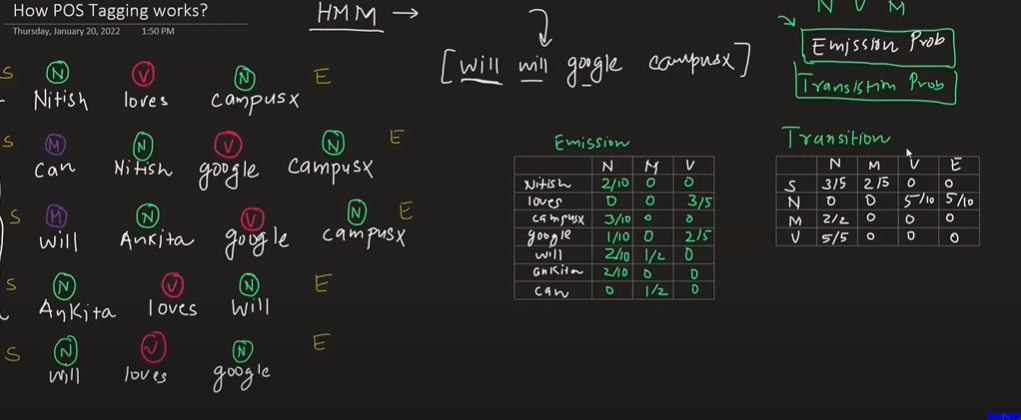

let consider each word be all tag. then start from start node to end node. select that tag path with highest probablity.


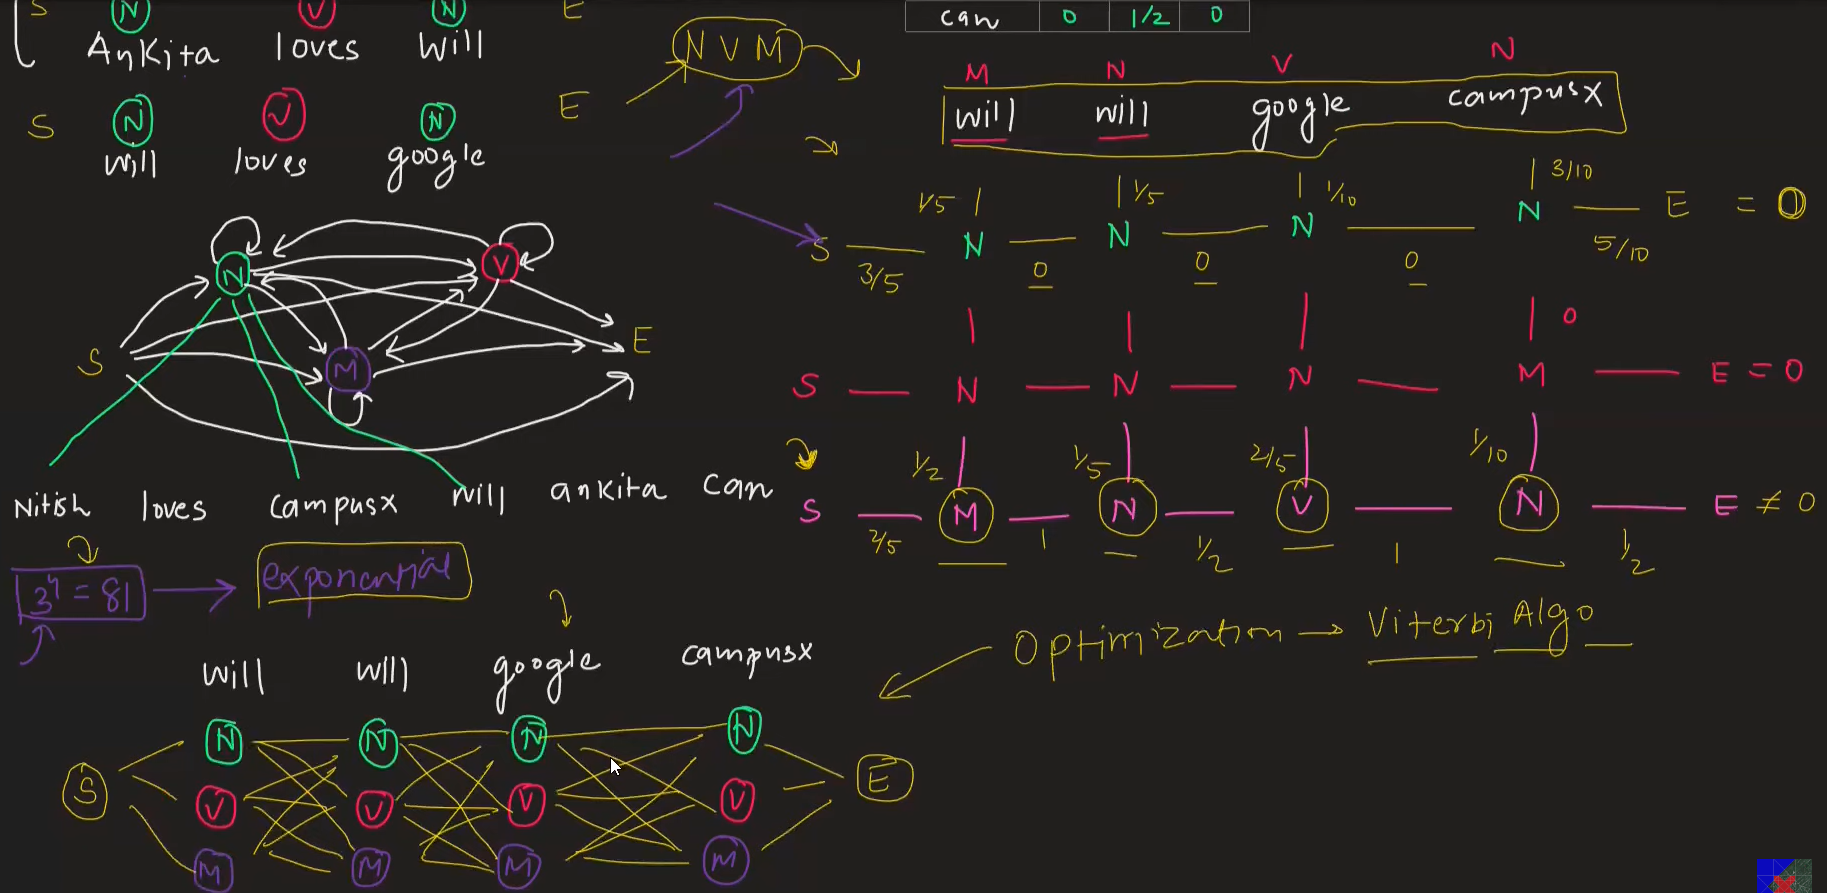

exponential grow in each len of sentence. so use viterbi algo

viterbi algo for optimization. working: ignore the path and node where prob becom zero

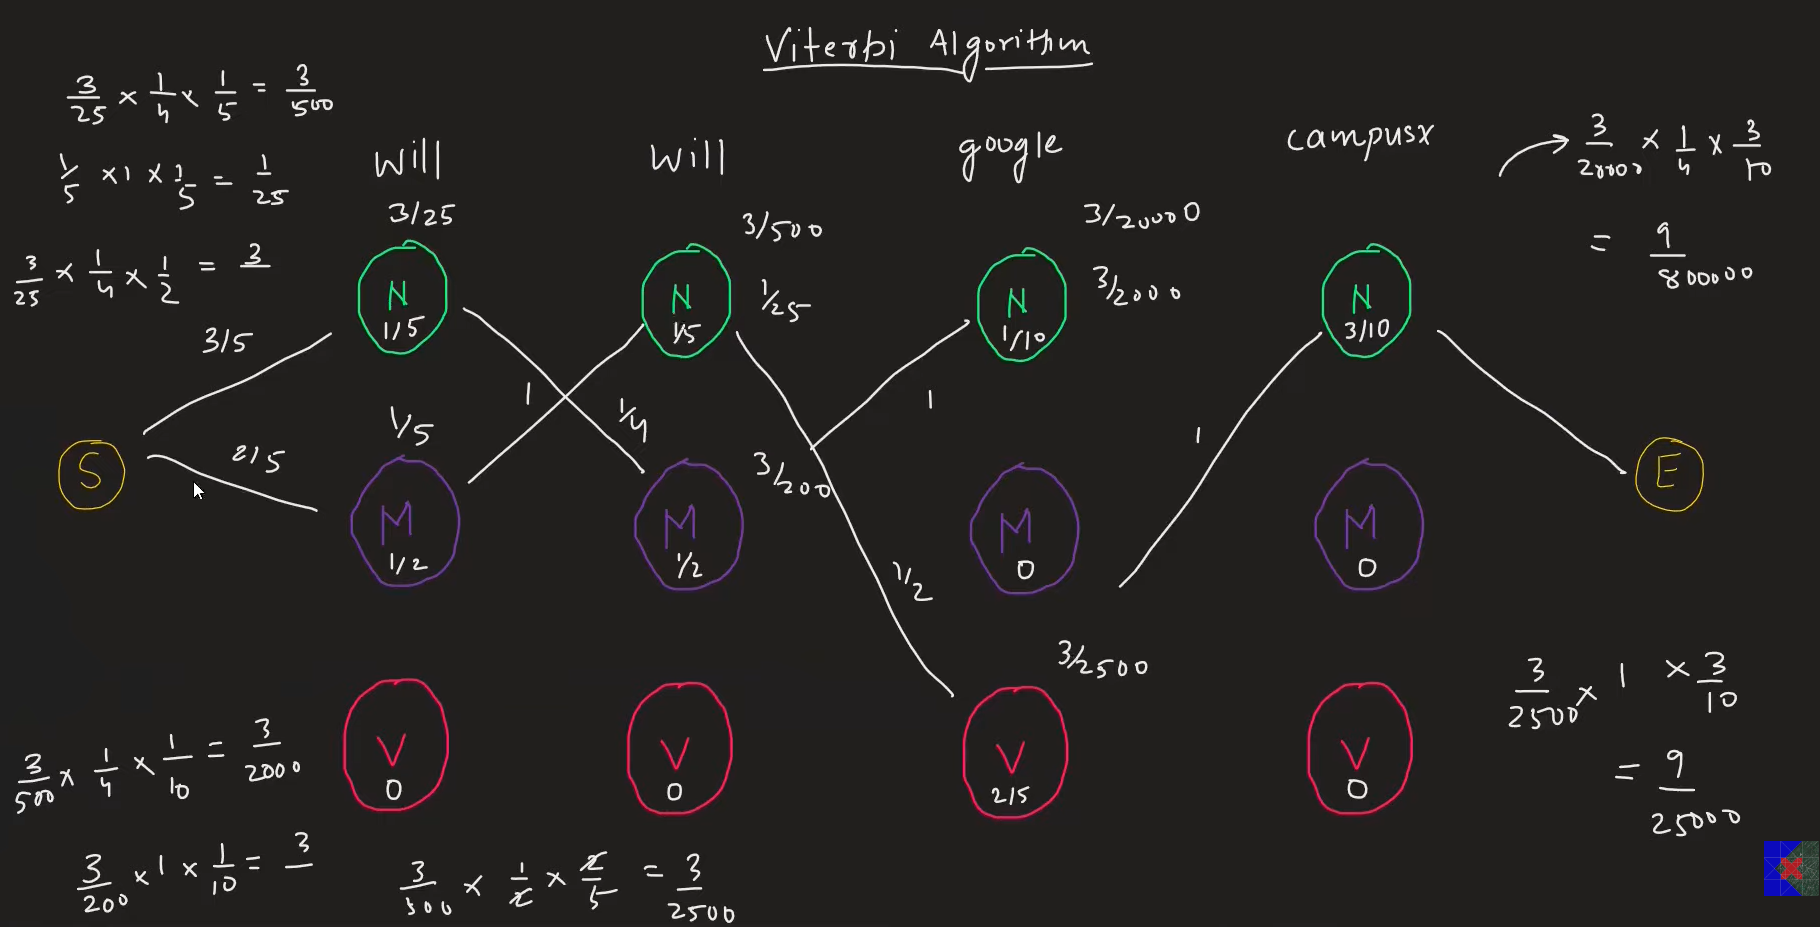

# Feature engineering

Text convert to numbers:

Bag of words

Tfidf

OHE

word2vec

ML algo: we need to do fe based on domain.
- Ad: we can understand why we get that result
- Dis: hectic since we need to know domain knowledge

DL: automatically dl do fe.
- Ad: easy to do fe
- Dis: don't why this show that result

corpus(c)= all word combination of dataset even the word repeat

vocabulary(v) = words

document (d)= one data

word (W)= each word

## OHE

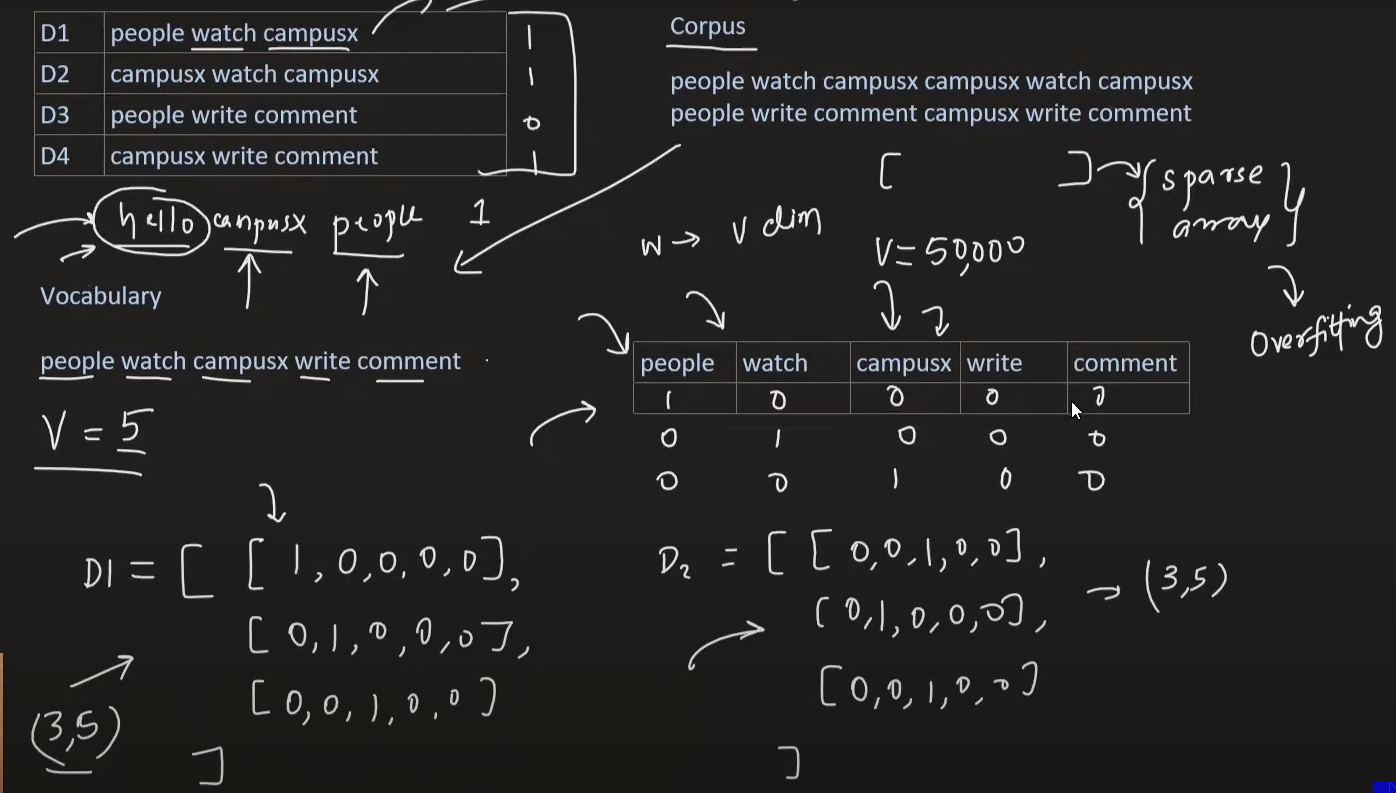

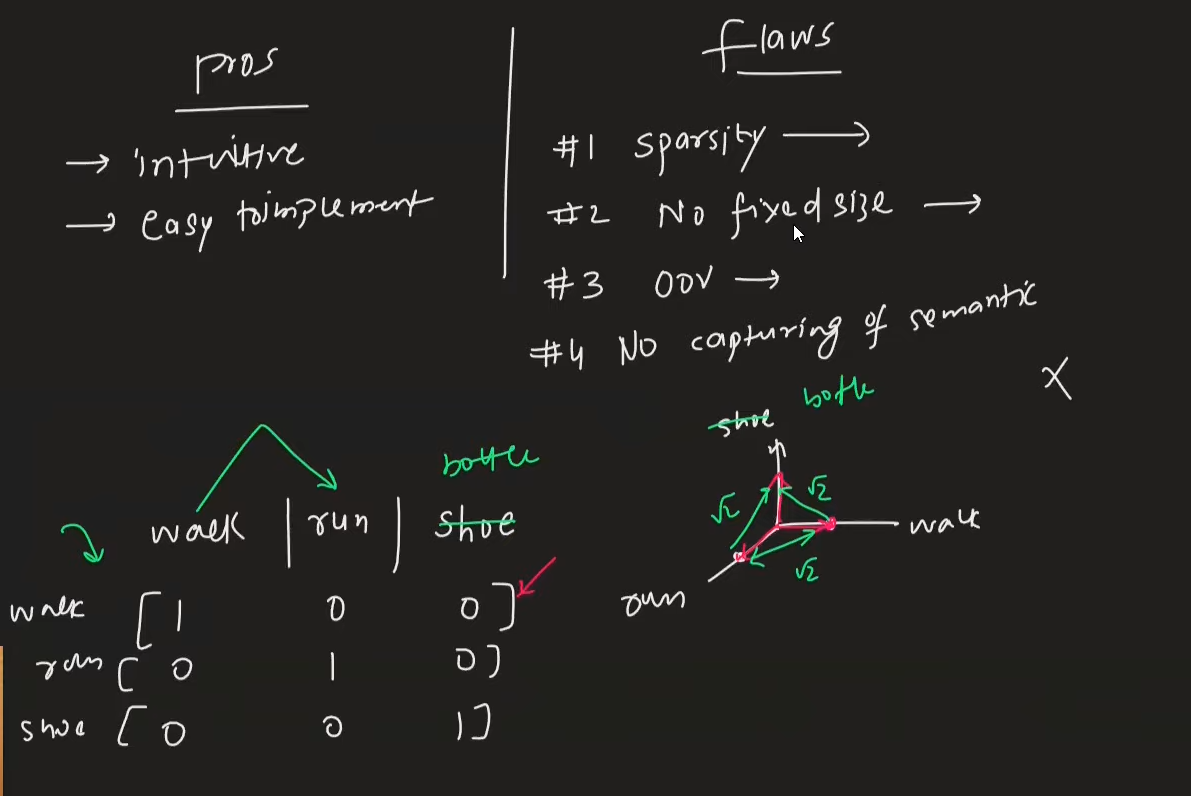

## Bag of words

Mostly use in test classification

 order of word doesnot matter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
bow=cv.fit_transform(df['text'])

## ngrams

order of word matter

1- word select(bag of word) = 1-grams

2 word select = 2 gram

n word select = n-gram

more n gram: better the result

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range=(1,2)) # 1, 2 means it make 1 word only also and 2 word each also

benefits:
1. able to capture semantic of the sentence
2. easy implement

dis:
1. number of dimension increases as n increase
2. out of vocab = it can only be ignore

## TfIdf

Tf=term frequemcy, Ifd= inverse doc frequency

TF(t,d)= (number of times term t appears in documnet d)/ (total number of terms in document d). particular word prop of comming in particular doc

IDF(t) = loge(Total number of documnets in the corpus)/(number of documents with term t in them)

now each word vector value on that doc = TF * IDF

weightage of each word can be different.

repeation of word in single dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray() # by default it return sparse matrix so we convert to array

in sklearn code they also add +1 to idf so it will not be ignore which it is 0.

## Word2Vec

Word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.



word embedding technique to convert word to vector(collection of numbers)

why ?
- capture semantic meaning
- low dim vector
- dense vector(not sparse means mostly non-zero vector so, no overfitting problem)

how?
- using deep learning



Pre-train weights of word2vec that was trained on google New corpus containing 3 billion words. this model consists of 300=dim vectors for 3 million words and phrases.

gensim lib

In [ ]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
!pip install wget

In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True,limit=500000)

number represent= 300 dim vector

In [ ]:
model.most_similar('word') # using cossine similarity

In [ ]:
model.similarity('word1','word2') # show the cosine simlarity value

In [ ]:
model.doesnt_match('similar1', 'no-similar', 'similar2') #which is not similar word

In [ ]:
vec= model['word1'] - model['word2'] + model['word3'] # this will give word that is similar to word1 and word 3 but not word 2
model.most_similar([vec])

neural network create the architecture of vector inside. but it is black box


Assumption: two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from a model

Types:

1. CBOW

2. Skip-gram

CBOW:

we try to solve fake problem so we get vector by product


given context word and predict the traget word

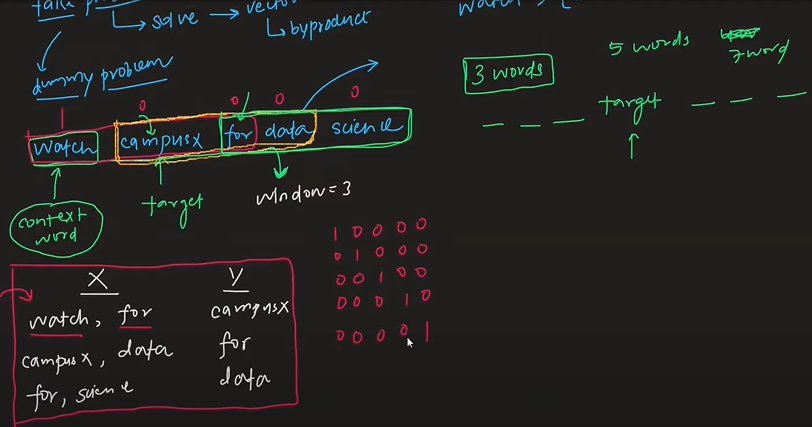

This is NN(neural network)

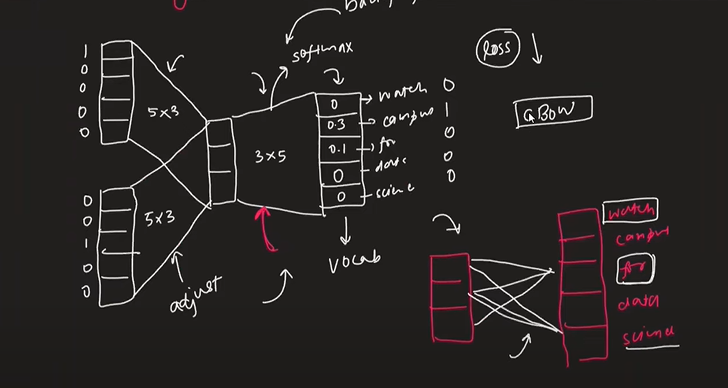

Skip-gram: just oppostie of cbow

given traget word and predict the context word

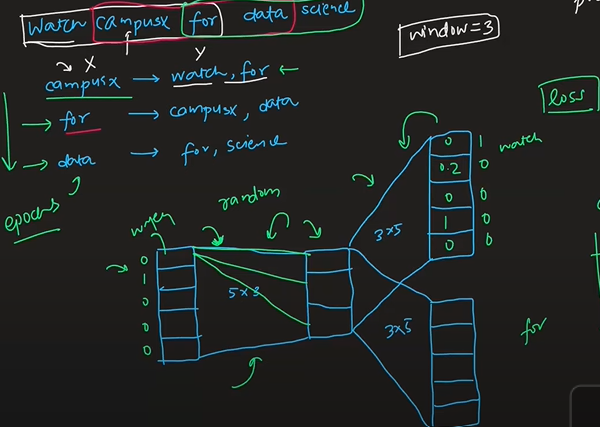

if small data use cbow

if large data use skip gram

For better performance:
- increase the training data
- increase the neuron netwok (dim of vector)
- increase the window size

https://github.com/campusx-official/game-of-thrones-word2vec/blob/main/game-of-thrones-word2vec.ipynb

# Modelling

MODEL:

use = heuristic, ML algo, DL, cloud API

less data = heuristic approach

intermidate amount of data = ML

huge data= DL(can also use transfer learning)

Evaluate:

intrinsic eval: use techniqual. use metrics(accuracy, precision, confusion matrix)

extrinsic eval: after deploy evaluated(business setting)

## Text Classification

Types:

1. binary classification=2 class
2. multi-class= more than 2 class
3. multilabel = can be label as more than one class

Application:
- email filter
- customer support
- sentiment analysis
- language detection
- fake news detection


Pipeline of text classification:

data acquistion -> text preprocessing -> text vectorization(BOW, TFIDF, WORD2Vec) -> modeling (ML= Navie Bayes, Random forest, SVM, DL= RNN, CNN, BERT) -> evaluation(accuracy, confusion matrix) -> deploy

Approches:

- heuristic= no use anymore. only use when no data.
- APIS = use api already made
- ML = text to vec(BOW, ngroms, TFIDF), model (SVM, navie bays, SVM)
- DL = RNN(LSTM), CNN, pretrain model (BERT)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
temp_df= pd.read_csv('imdb_Dataset.csv')
df= temp_df.iloc[:1000]

In [ ]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df['sentiment'].value_counts()

sentiment
positive    501
negative    499
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
import re
def remove_tags(text):
  return re.compile(r'<[^>]+>').sub('', text)

In [ ]:
df['review']=df['review'].apply(remove_tags)

/tmp/ipython-input-8-2928534252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_tags)


In [ ]:
df.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive

In [ ]:
df['review']=df['review'].apply(lambda x: x.lower())

/tmp/ipython-input-10-3883677782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(lambda x: x.lower())


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review']=df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

/tmp/ipython-input-12-2284343658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [ ]:
df.head(2)

review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production. filming technique...  positive

In [ ]:
X= df['review'] # df.iloc[:, 0:1]
y= df['sentiment']

In [ ]:
X.head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production. filming technique...
2    thought wonderful way spend time hot summer we...
3    basically there's family little boy (jake) thi...
4    petter mattei's "love time money" visually stu...
Name: review, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y= encoder.fit_transform(y) # change postive and negative to 0 and 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((800,), (200,))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv= CountVectorizer()
X_train_cv= cv.fit_transform(X_train).toarray()
X_test_cv= cv.transform(X_test).toarray()

In [ ]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train_cv.shape

(800, 15935)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

model= GaussianNB()
model.fit(X_train_cv, y_train)
y_pred= model.predict(X_test_cv)
accuracy_score(y_test, y_pred)


0.555

In [ ]:
confusion_matrix(y_test, y_pred)

array([[58, 56],
       [33, 53]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train_cv, y_train)
y_pred= model.predict(X_test_cv)
accuracy_score(y_test, y_pred)

0.81

In [ ]:
confusion_matrix(y_test, y_pred)

array([[83, 31],
       [ 7, 79]])

Using TFIDF

In [ ]:
tfidf= TfidfVectorizer()
X_train_tfidf= tfidf.fit_transform(X_train).toarray()
X_test_tfidf= tfidf.transform(X_test).toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

model= GaussianNB()
model.fit(X_train_tfidf, y_train)
y_pred= model.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.53

In [ ]:
confusion_matrix(y_test, y_pred)

array([[51, 63],
       [31, 55]])

WORD2VEC

In [ ]:
!pip install --upgrade numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.5 MB/s eta 0:00:00


In [ ]:
!pip install numpy==1.23.5 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
blosc2 3.4.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
bigframes 2.6.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is inc

In [ ]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
story=[]
for doc in df['review']:
  raw_sent= sent_tokenize(doc)
  for sent in raw_sent:
    story.append(simple_preprocess(sent))

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)
model.build_vocab(story)

In [ ]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(554720, 621105)

In [ ]:
def document_vector(doc):
  doc= [word for word in doc.split() if word in model.wv.index_to_key]
  return np.mean(model.wv[doc], axis=0)

In [ ]:
document_vector(df['review'].iloc[0])

array([-0.28336927,  0.2279181 ,  0.08283199,  0.27676728,  0.08323688,
       -0.66328496,  0.3413756 ,  0.7906567 , -0.29978615, -0.0861446 ,
       -0.25534734, -0.53609353, -0.19063649,  0.12306091,  0.15293257,
       -0.31058666,  0.16697702, -0.5512354 ,  0.09410114, -0.7995442 ,
        0.23785427,  0.15106316,  0.25969067, -0.25662404, -0.05381188,
        0.00319321, -0.12432477, -0.09246682, -0.34651044,  0.01380725,
        0.46958727,  0.0009917 ,  0.06174742, -0.14815621, -0.08647287,
        0.19836792,  0.01141855, -0.25408608, -0.15919578, -0.8153878 ,
       -0.08096083, -0.3695707 , -0.09852462,  0.08470695,  0.34484205,
       -0.11935078, -0.27854225, -0.08030785,  0.31905586,  0.19229382,
        0.23448749, -0.31471083, -0.19460434, -0.03317944, -0.28781557,
        0.14901164,  0.19964883,  0.11006837, -0.34351128,  0.17128487,
        0.04615107,  0.24615663, -0.1472795 , -0.00855676, -0.41311193,
        0.2657993 , -0.05842038,  0.21664283, -0.3331898 ,  0.54

In [ ]:
from tqdm import tqdm
X=[]
for doc in tqdm(df['review']):
  X.append(document_vector(doc))

100%|██████████| 1000/1000 [00:15<00:00, 64.32it/s]


In [ ]:
X=np.array(X)

In [ ]:
y[:5]

array([1, 1, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model= RandomForestClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy_score(y_test, y_pred)

0.565

**Advise:**

- ensemble techniques better
- use heuristic features if you have more domain knowledge
- try using ML first then use DL
- no imbalance data


# Deployment

- Deploy
- Monitoring
- Update